In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import strong_lens
from mejiro.utils import util

In [24]:
test_mass = 2e11

einstein_radius = strong_lens.mass_to_einstein_radius(test_mass, 1, 2, 1)
print(f'Einstein radius for a mass of {test_mass:.2e} is {einstein_radius:.2f} arcsec')

recovered_mass = strong_lens.einstein_radius_to_mass(einstein_radius, 1, 2, 1)
print(f'Mass recovered from an Einstein radius of {einstein_radius:.2f} is {recovered_mass:.2e} Msun')

Einstein radius for a mass of 2.00e+11 is 0.90 arcsec
Mass recovered from an Einstein radius of 0.90 is 2.00e+11 Msun


In [3]:
pickled_lens_list = os.path.join(config.machine.dir_01, '01_hlwas_sim_detectable_lens_list.pkl')
lens_list = util.unpickle(pickled_lens_list)

In [4]:
einstein_radii = [l.get_einstein_radius() for l in lens_list]

masses_in_er = []
einstein_radii_calc = []
for l in lens_list:
    mass_in_er = l.mass_in_einstein_radius()
    masses_in_er.append(mass_in_er)
    er_calc = strong_lens.mass_to_einstein_radius(mass_in_er, l.d_l, l.d_s, l.d_ls)
    einstein_radii_calc.append(er_calc)

dif = [util.percent_difference(e, ec) for e, ec in zip(einstein_radii, einstein_radii_calc)]

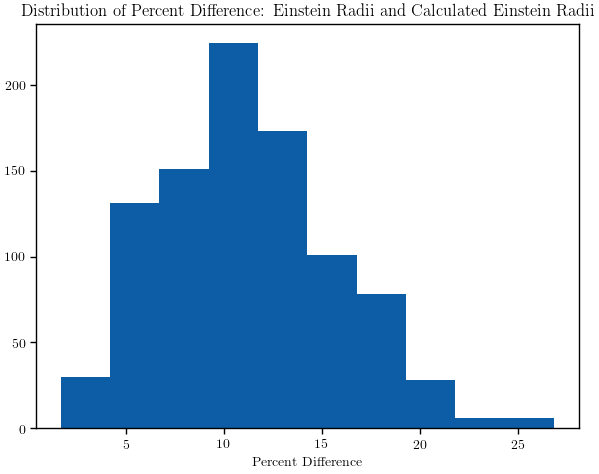

In [5]:
plt.hist(dif)
plt.title('Distribution of Percent Difference: Einstein Radii and Calculated Einstein Radii')
plt.xlabel('Percent Difference')
plt.show()

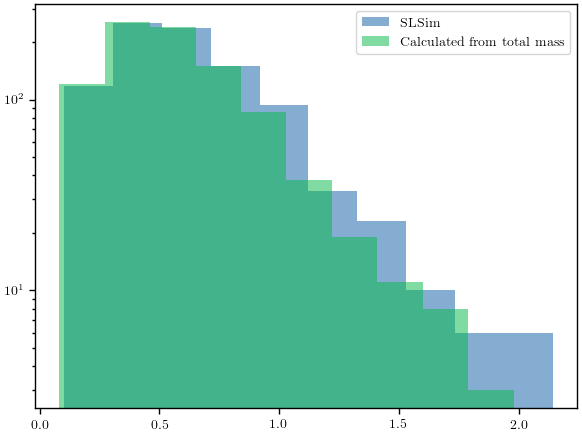

In [6]:
plt.hist(einstein_radii, label='SLSim', alpha=0.5)
plt.hist(einstein_radii_calc, label='Calculated from total mass', alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

In [19]:
mass_in_er_calc = [strong_lens.einstein_radius_to_mass(l.get_einstein_radius(), l.d_l, l.d_s, l.d_ls) for l in
                   lens_list]

dif = [util.percent_difference(e, ec) for e, ec in zip(masses_in_er, mass_in_er_calc)]

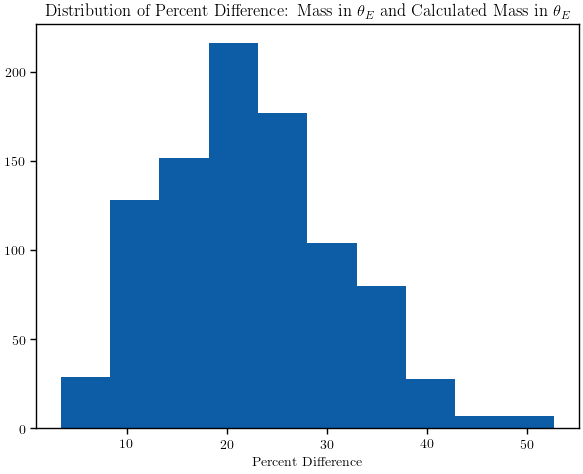

In [26]:
plt.hist(dif)
plt.title(r'Distribution of Percent Difference: Mass in $\theta_E$ and Calculated Mass in $\theta_E$')
plt.xlabel('Percent Difference')
plt.show()

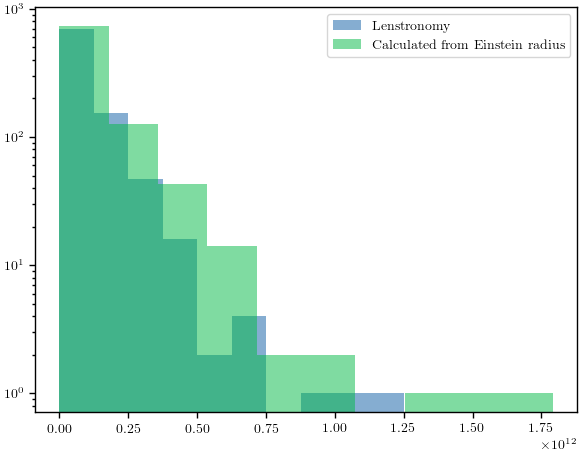

In [21]:
plt.hist(masses_in_er, label='Lenstronomy', alpha=0.5)
plt.hist(mass_in_er_calc, label='Calculated from Einstein radius', alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()

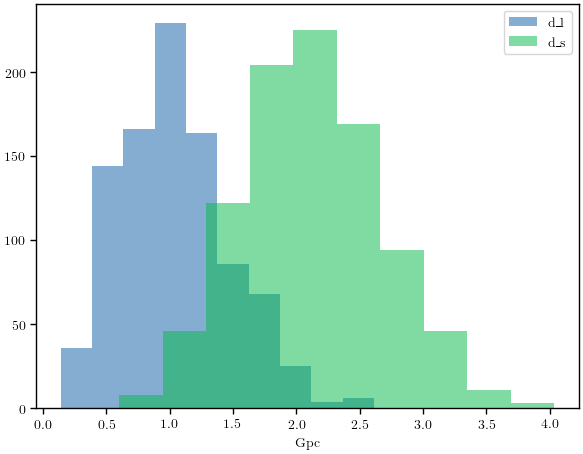

In [22]:
plt.hist([l.d_l for l in lens_list], label='d_l', alpha=0.5)
plt.hist([l.d_s for l in lens_list], label='d_s', alpha=0.5)
# plt.hist([l.d_ls for l in lens_list], label='d_ls', alpha=0.5)
plt.legend()
plt.xlabel('Gpc')
plt.show()